<a href="https://colab.research.google.com/github/itzPranshul/BioDrop/blob/main/HousePricePredictionPBL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# House Price Prediction ML Model

**Importing the dataset**

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("jenilhareshbhaighori/house-price-prediction")

print("Path to dataset files:", path)

100%|██████████| 634k/634k [00:00<00:00, 32.5MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/jenilhareshbhaighori/house-price-prediction/versions/1


In [3]:
import pandas as pd

# Path to the dataset file
file_path = '/root/.cache/kagglehub/datasets/jenilhareshbhaighori/house-price-prediction/versions/1/house_cleaned.csv'

# Replace 'your-dataset-file.csv' with the actual file name
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(df.head())

                                      property_name property_type  \
0    5 Bedroom House for sale in Sector 70A Gurgaon         house   
1  5 Bedroom House for sale in Sector 21A Faridabad         house   
2  10 Bedroom House for sale in Sushant Lok Phase 1         house   
3    21 Bedroom House for sale in Sector 54 Gurgaon         house   
4  12 Bedroom House for sale in Sushant Lok Phase 1         house   

            society  price  price_per_sqft    area  \
0  bptp visionnaire   5.25         20115.0  2610.0   
1       independent   5.70        105751.0   539.0   
2       independent   2.10         38251.0   549.0   
3       independent   5.00         43066.0  1161.0   
4       independent   3.00         53763.0   558.0   

                  areaWithType  bedRoom  bathroom balcony  \
0  Plot area 290(242.48 sq.m.)        5         4      3+   
1   Plot area 539(50.07 sq.m.)        5         4       2   
2       Plot area 61(51 sq.m.)       10        10      3+   
3  Plot area 129

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [5]:


# Display basic information
print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 964 entries, 0 to 963
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   property_name    964 non-null    object 
 1   property_type    964 non-null    object 
 2   society          964 non-null    object 
 3   price            945 non-null    float64
 4   price_per_sqft   945 non-null    float64
 5   area             945 non-null    float64
 6   areaWithType     964 non-null    object 
 7   bedRoom          964 non-null    int64  
 8   bathroom         964 non-null    int64  
 9   balcony          964 non-null    object 
 10  additionalRoom   964 non-null    object 
 11  address          959 non-null    object 
 12  floorNum         945 non-null    float64
 13  facing           661 non-null    object 
 14  agePossession    964 non-null    object 
 15  nearbyLocations  848 non-null    object 
 16  description      964 non-null    object 
 17  furnishDetails  

**Data processing**

In [6]:
df = df.dropna()  # Simple approach: drop rows with missing values
# Alternatively, use imputation
# df.fillna(df.mean(), inplace=True)

In [7]:
df = pd.get_dummies(df, drop_first=True)

**Data visualization**

In [8]:
X = df.drop("price", axis=1)  # Replace "price" with your target column
y = df["price"]

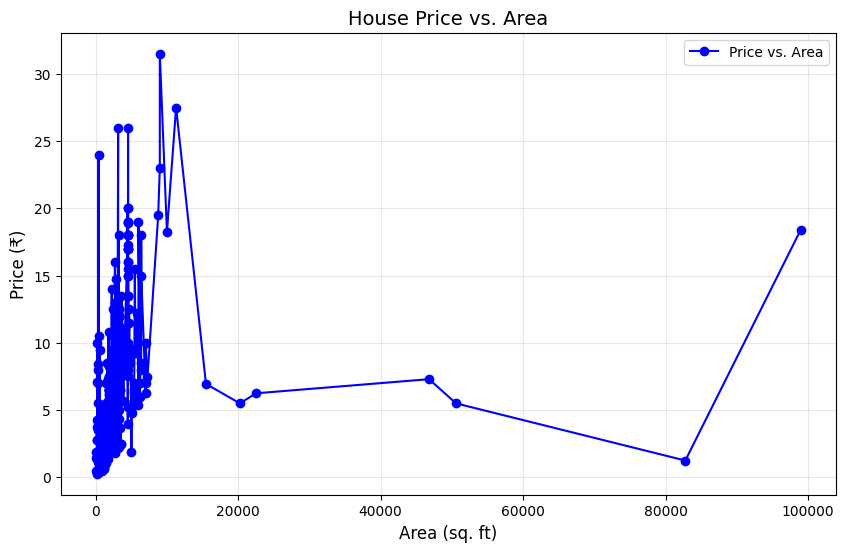

In [9]:
import matplotlib.pyplot as plt

# Ensure 'price' and 'area' columns exist in the dataset
if 'price' in df.columns and 'area' in df.columns:
    # Sort the data by area for better visualization
    df_sorted = df.sort_values(by='area')

    # Plot the data
    plt.figure(figsize=(10, 6))
    plt.plot(df_sorted['area'], df_sorted['price'], marker='o', linestyle='-', color='b', label='Price vs. Area')

    # Add labels, title, and legend
    plt.xlabel('Area (sq. ft)', fontsize=12)
    plt.ylabel('Price (₹)', fontsize=12)
    plt.title('House Price vs. Area', fontsize=14)
    plt.legend()
    plt.grid(alpha=0.3)

    # Show the plot
    plt.show()
else:
    print("Columns 'price' and 'area' are not present in the dataset.")


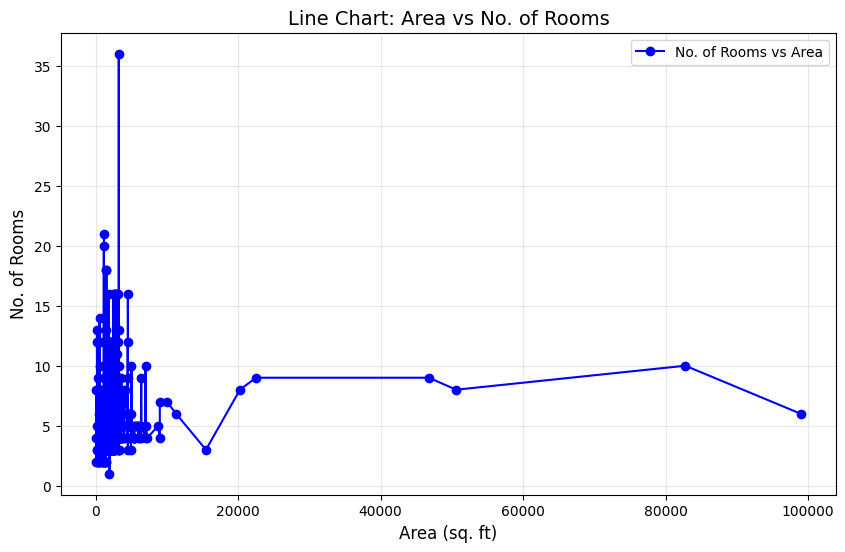

In [10]:
import matplotlib.pyplot as plt

# Ensure 'area' and 'rooms' columns exist in the dataset
if 'area' in df.columns and 'bedRoom' in df.columns:
    # Sort data by 'area' for better visualization
    df_sorted = df.sort_values(by='area')

    # Plot the line chart
    plt.figure(figsize=(10, 6))
    plt.plot(df_sorted['area'], df_sorted['bedRoom'], marker='o', linestyle='-', color='blue', label='No. of Rooms vs Area')

    # Add titles and labels
    plt.title('Line Chart: Area vs No. of Rooms', fontsize=14)
    plt.xlabel('Area (sq. ft)', fontsize=12)
    plt.ylabel('No. of Rooms', fontsize=12)

    # Add grid and legend
    plt.grid(alpha=0.3)
    plt.legend(fontsize=10)

    # Show the chart
    plt.show()
else:
    print("The columns 'area' and 'rooms' are not found in the dataset.")


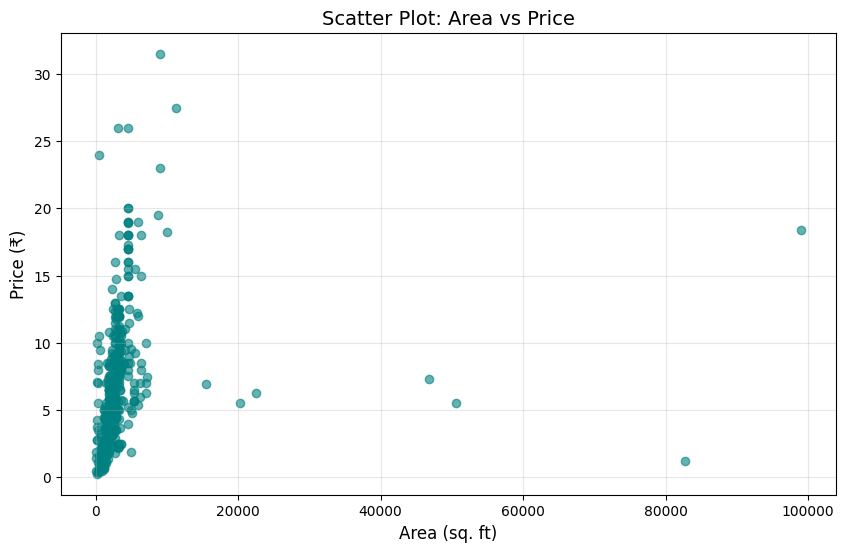

In [11]:
plt.figure(figsize=(10, 6))
plt.scatter(df['area'], df['price'], alpha=0.6, color='teal')
plt.title('Scatter Plot: Area vs Price', fontsize=14)
plt.xlabel('Area (sq. ft)', fontsize=12)
plt.ylabel('Price (₹)', fontsize=12)
plt.grid(alpha=0.3)
plt.show()


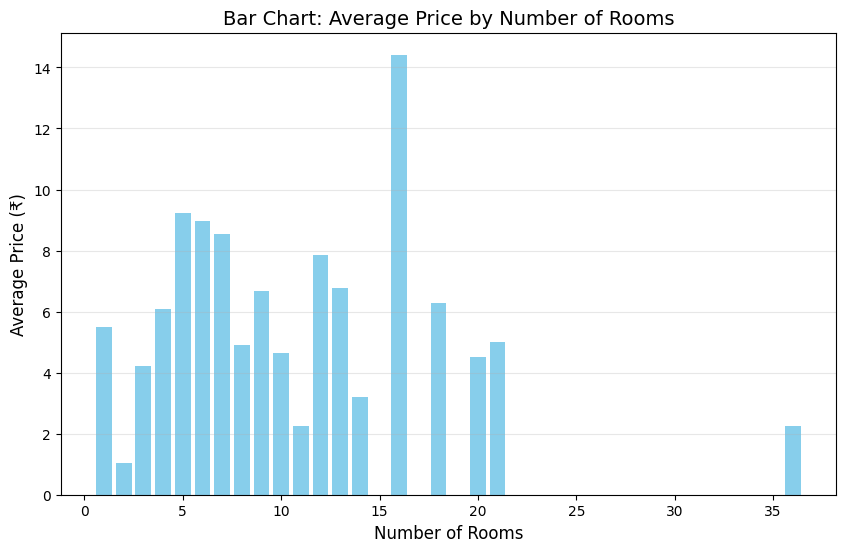

In [12]:
avg_price_per_room = df.groupby('bedRoom')['price'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(avg_price_per_room['bedRoom'], avg_price_per_room['price'], color='skyblue')
plt.title('Bar Chart: Average Price by Number of Rooms', fontsize=14)
plt.xlabel('Number of Rooms', fontsize=12)
plt.ylabel('Average Price (₹)', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.show()


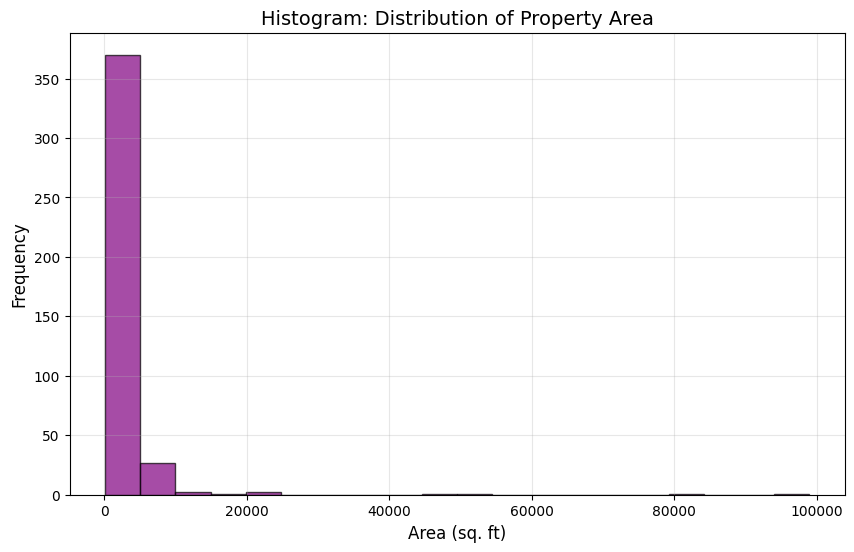

In [13]:
plt.figure(figsize=(10, 6))
plt.hist(df['area'], bins=20, color='purple', edgecolor='black', alpha=0.7)
plt.title('Histogram: Distribution of Property Area', fontsize=14)
plt.xlabel('Area (sq. ft)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(alpha=0.3)
plt.show()


<ipython-input-14-f2cd11ed603a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='bedRoom', y='price', data=df, palette='Set3')


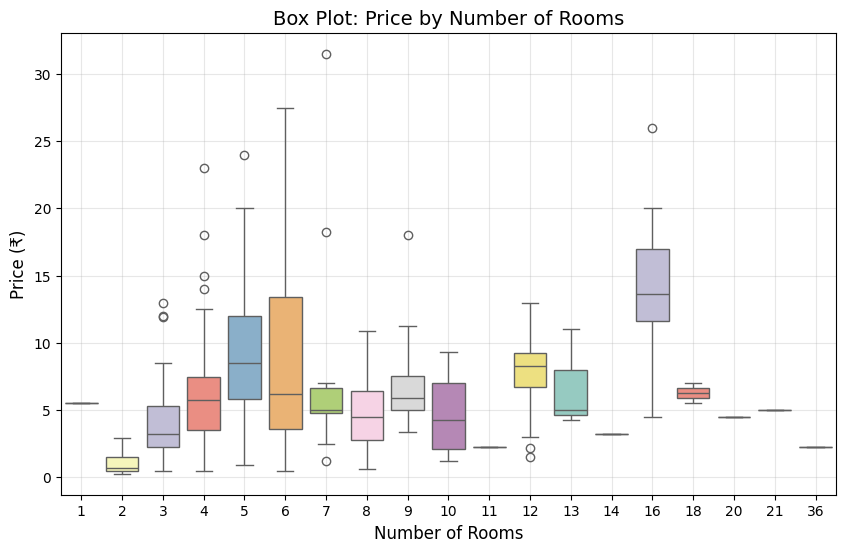

In [14]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='bedRoom', y='price', data=df, palette='Set3')
plt.title('Box Plot: Price by Number of Rooms', fontsize=14)
plt.xlabel('Number of Rooms', fontsize=12)
plt.ylabel('Price (₹)', fontsize=12)
plt.grid(alpha=0.3)
plt.show()


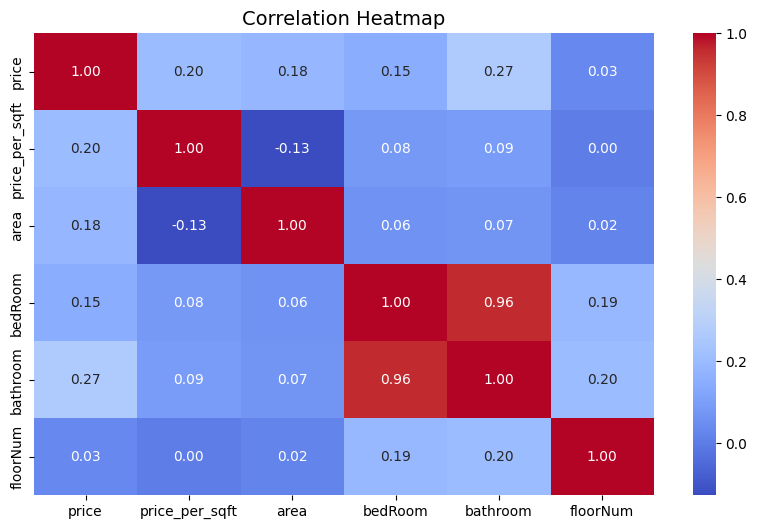

In [15]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap', fontsize=14)
plt.show()


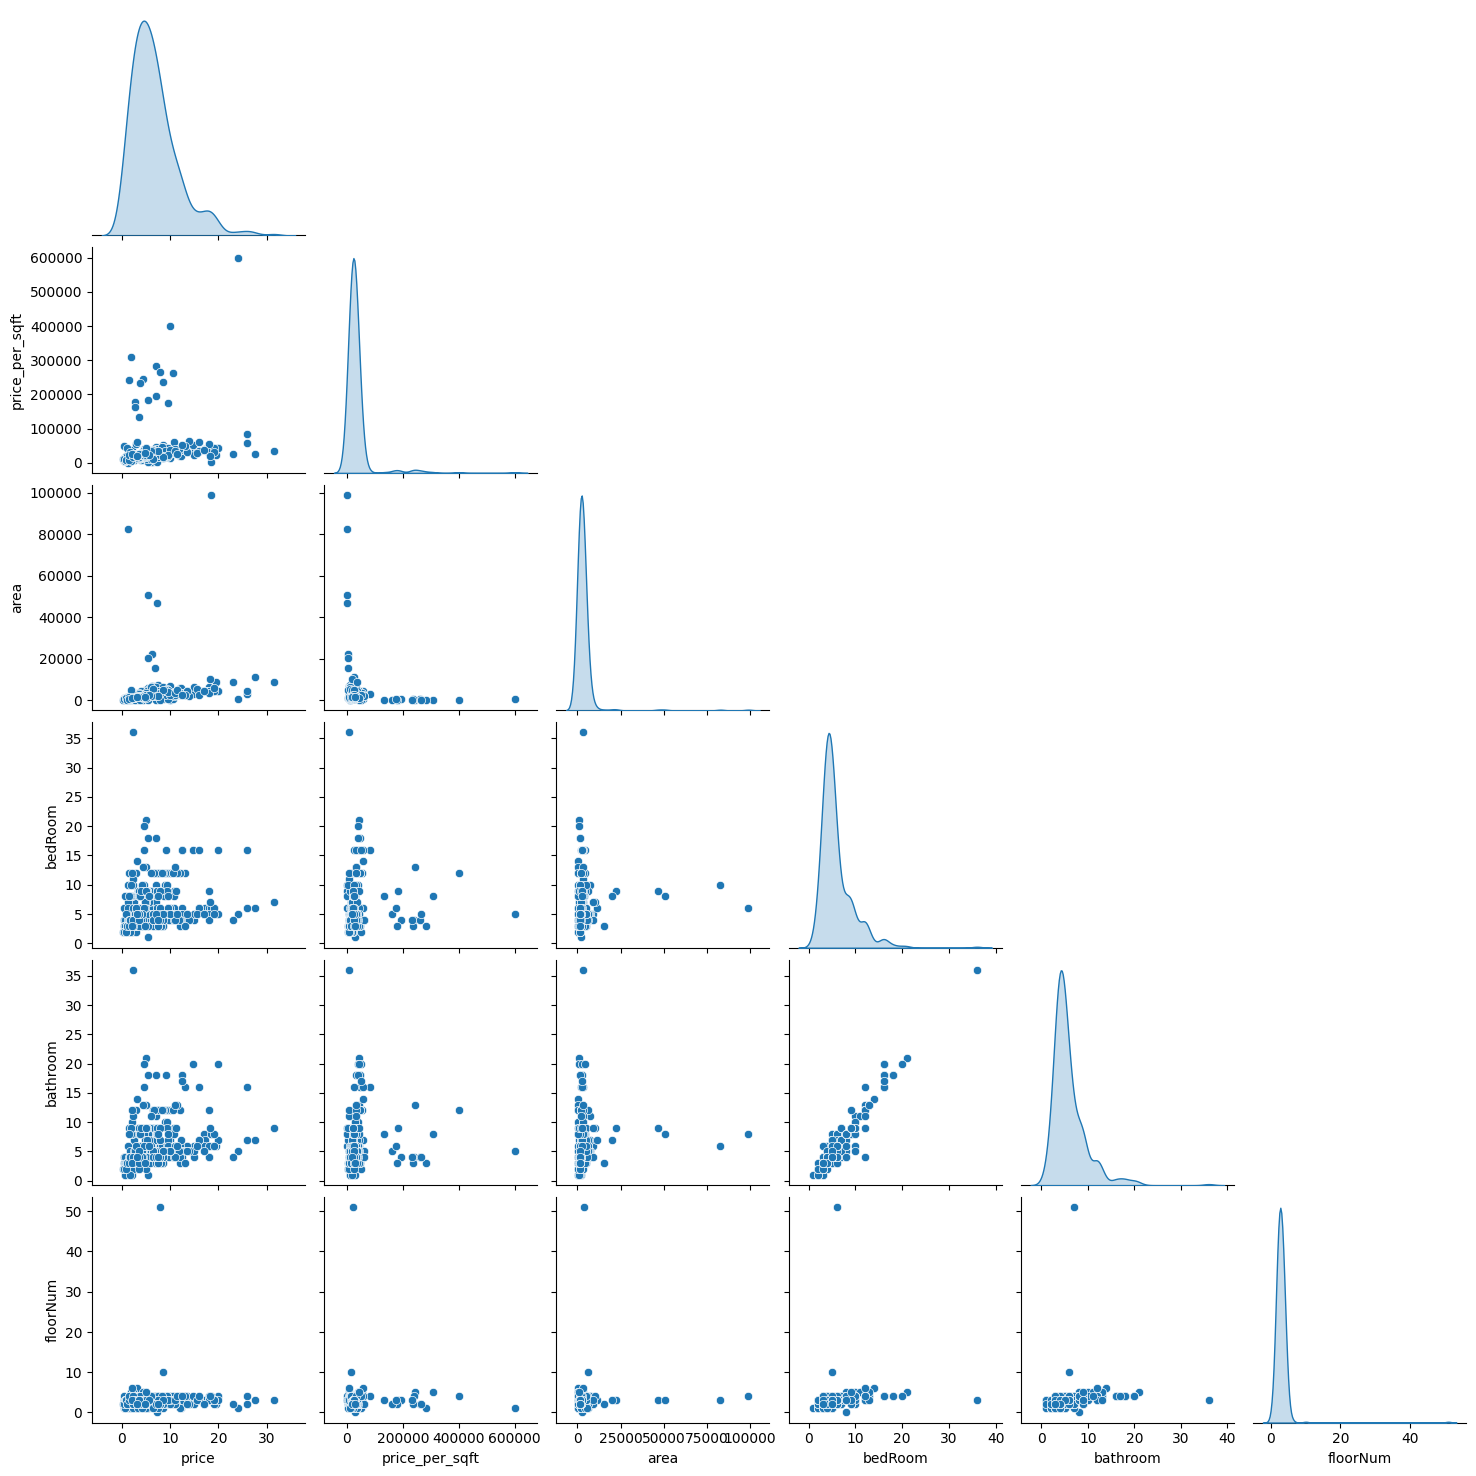

In [16]:
sns.pairplot(numeric_df, diag_kind='kde', corner=True)
plt.show()


In [17]:
if 'property_type' in df.columns:
    property_counts = df['property_type'].value_counts()

    plt.figure(figsize=(8, 8))
    plt.pie(property_counts, labels=property_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
    plt.title('Property Type Distribution', fontsize=14)
    plt.show()


**Model building**

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Linear regression**

In [19]:
# Initialize Linear Regression model
lr = LinearRegression()

# Train the model
lr.fit(X_train, y_train)

# Predictions
y_pred_lr = lr.predict(X_test)

# Evaluate Linear Regression
print("Linear Regression Performance:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_lr))
print("R^2 Score:", r2_score(y_test, y_pred_lr))


Linear Regression Performance:
Mean Squared Error: 9.819045332239094
R^2 Score: 0.5333929799861725


**Random forest**

In [20]:
# Initialize Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)

# Evaluate Random Forest
print("\nRandom Forest Performance:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_rf))
print("R^2 Score:", r2_score(y_test, y_pred_rf))



Random Forest Performance:
Mean Squared Error: 3.0137634215853653
R^2 Score: 0.8567841249744033


In [21]:
import joblib

# Save models
joblib.dump(lr, "linear_regression_model.pkl")
joblib.dump(rf, "random_forest_model.pkl")

# Load models
# lr_model = joblib.load("linear_regression_model.pkl")
# rf_model = joblib.load("random_forest_model.pkl")

['random_forest_model.pkl']

**Desicion tree**

Mean Squared Error: 18.877984747780822
R-squared: 0.1029066565048824


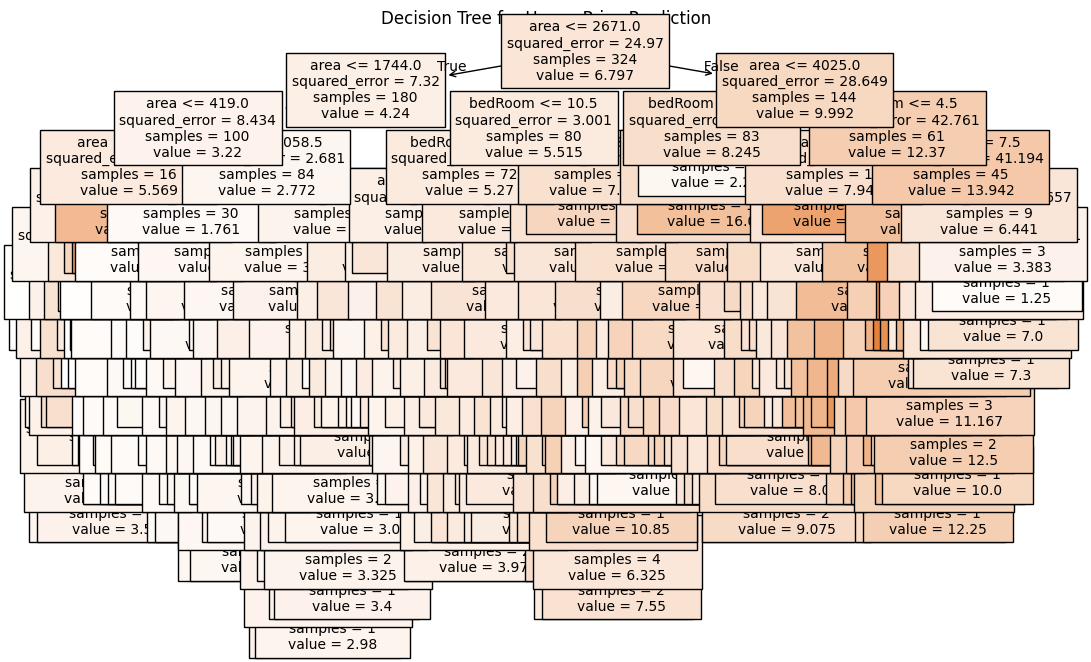

In [22]:
# Step 1: Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# Handle missing values (if any)
imputer = SimpleImputer(strategy='mean')

# Ensure the columns exist before imputation
columns_to_impute = ['area', 'price', 'bedRoom']
for col in columns_to_impute:
    if col in df.columns:
        df[col] = imputer.fit_transform(df[[col]])

# Handle categorical features (if any, e.g., property_type)
if 'property_type' in df.columns:
    label_encoder = LabelEncoder()
    df['property_type'] = label_encoder.fit_transform(df['property_type'])

# Step 3: Split the data into features (X) and target (y)
X = df[['area', 'bedRoom']]  # Using 'area' and 'rooms' as features (you can add more features)
y = df['price']  # Target variable (price)

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train a Decision Tree Regressor model
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Step 5: Make predictions
y_pred = model.predict(X_test)

# Step 6: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Optional: Visualizing the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(model, filled=True, feature_names=['area', 'bedRoom'], fontsize=10)
plt.title("Decision Tree for House Price Prediction")
plt.show()


**BUILDING MODEL 2**

In [23]:
from sklearn.model_selection import train_test_split

X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [24]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)


LinearRegression()

In [25]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=5, random_state=42)

In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluate Linear Regression
lr_pred = lr_model.predict(X_test)
print("Linear Regression MAE:", mean_absolute_error(y_test, lr_pred))
print("Linear Regression R2:", r2_score(y_test, lr_pred))

# Evaluate Decision Tree
dt_pred = dt_model.predict(X_test)
print("Decision Tree MAE:", mean_absolute_error(y_test, dt_pred))
print("Decision Tree R2:", r2_score(y_test, dt_pred))


Linear Regression MAE: 2.171201329852062
Linear Regression R2: 0.5333929799861725
Decision Tree MAE: 1.537712349808257
Decision Tree R2: 0.7096339956994073


In [27]:
!pip install streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 36.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 40.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 4.4 MB/s eta 0:00:00


In [28]:
!pip install pyngrok


In [29]:
%%writefile app.py
import streamlit as st

st.title("House Price Prediction")
area = st.number_input("Enter the area in sq. ft.")
bedrooms = st.number_input("Enter the number of bedrooms")
bathrooms = st.number_input("Enter the number of bathrooms")
if st.button("Predict"):
    # Dummy example for now
    price = area * 1000 + bedrooms * 50000 + bathrooms * 25000
    st.write(f"Predicted Price: ₹{price:,.2f}")


Overwriting app.py


In [30]:
from pyngrok import ngrok

!streamlit run app.py &>/dev/null&  # Run Streamlit in the background
public_url = ngrok.connect(port='8501')  # Expose the Streamlit port
print(f"Streamlit is running on {public_url}")


ERROR:pyngrok.process.ngrok:t=2024-12-22T18:20:23+0000 lvl=eror msg="failed to reconnect session" obj=tunnels.session err="authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n"
ERROR:pyngrok.process.ngrok:t=2024-12-22T18:20:23+0000 lvl=eror msg="session closing" obj=tunnels.session err="authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n"
ERROR:pyngrok.process.ngrok:t=2024-12-22T18:20:23+0000 lvl=eror msg="terminating with error" obj=app err="authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your aut

PyngrokNgrokError: The ngrok process errored on start: authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n.